# Polynomial Regression

### developer: mehdi sahraei

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data with pandas
- taking a look at the dataset and analyzing data


In [2]:
df = pd.read_csv("dataset3.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,x1,x2,x3,x4,y
0,-0.383285,0.146907,-0.056307,0.021582,-0.245841
1,0.831785,0.691866,0.575484,0.478679,1.839005
2,0.415071,0.172284,0.071510,0.029682,0.859224
3,-0.628672,0.395228,-0.248469,0.156205,-0.174309
4,-0.087517,0.007659,-0.000670,0.000059,0.013225


## A more concise view of the data


In [4]:
cdf = df[['x1','x2','x3','x4','y']]
cdf.head(10)

,x1,x2,x3,x4,y
0,-0.383285,1.469070e-01,-5.630719e-02,2.158167e-02,-0.245841
1,0.831785,6.918660e-01,5.754837e-01,4.786786e-01,1.839005
2,0.415071,1.722838e-01,7.150996e-02,2.968169e-02,0.859224
3,-0.628672,3.952284e-01,-2.484690e-01,1.562055e-01,-0.174309
4,-0.087517,7.659193e-03,-6.703081e-04,5.866323e-05,0.013225
5,1.213338,1.472189e+00,1.786263e+00,2.167341e+00,1.654046
6,-1.165563,1.358537e+00,-1.583460e+00,1.845622e+00,-0.330590
7,-0.000199,3.961433e-08,-7.884580e-12,1.569295e-15,-0.204364
8,0.988463,9.770587e-01,9.657862e-01,9.546438e-01,1.842551
9,-0.255599,6.533063e-02,-1.669841e-02,4.268091e-03,-0.358899


## Data Exploration


In [6]:
#data summary 
df.describe()

,x1,x2,x3,x4,y
count,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,0.255966,4.334303e-01,0.282694,5.455288e-01,0.581019
std,0.607980,5.994549e-01,0.955259,1.356668e+00,0.799835
min,-1.634782,3.961433e-08,-4.368976,1.569295e-15,-3.189842
25%,-0.150384,3.993358e-02,-0.003404,1.594735e-03,-0.004072
50%,0.248990,1.724409e-01,0.015442,2.973590e-02,0.374672
75%,0.658075,5.877565e-01,0.285016,3.455183e-01,1.165324
max,1.765677,3.117616e+00,5.504704,9.719531e+00,2.375315


## data histogram

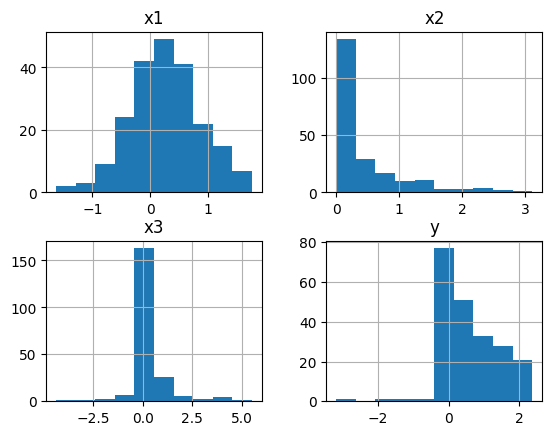

In [8]:
df_hist = cdf[['x1','x2','x3','y']]
df_hist.hist()
plt.show()

## drawing plot and scatter

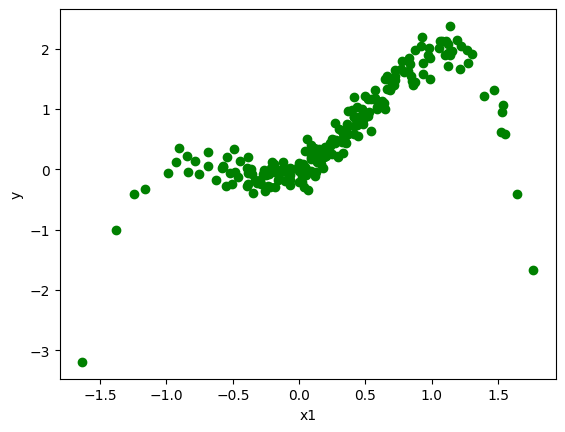

In [11]:
plt.scatter(cdf.x1, cdf.y,  color='green')
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

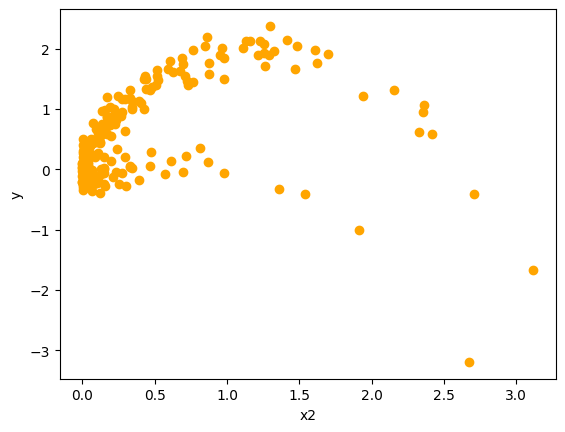

In [12]:
plt.scatter(cdf.x2, cdf.y,  color='orange')
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

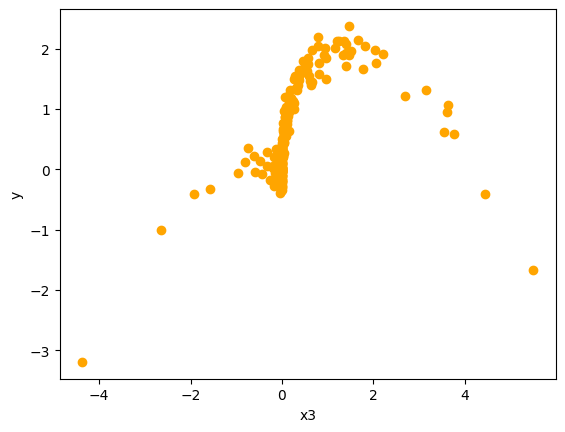

In [13]:
plt.scatter(cdf.x3, cdf.y,  color='orange')
plt.xlabel("x3")
plt.ylabel("y")
plt.show()

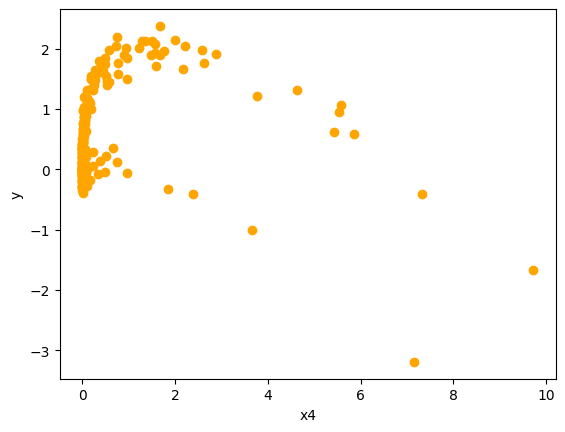

In [14]:
plt.scatter(cdf.x4, cdf.y,  color='orange')
plt.xlabel("x4")
plt.ylabel("y")
plt.show()

## Creating train and test dataset

In [35]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## training model

- x2 ->  X^2
- y=b+θ_1x_1+θ_2x_2    ----  it's that formula for obtaining Polynomial line
- sample for: poly = PolynomialFeatures(degree=2) if values be [[2. ]
 [2.4]
 [1.5]] Each component reaches the power of 0, 1, and 2, and this depends on the degree
- n ^ 0 = 1

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

regr = linear_model.LinearRegression()

#asanyarray: converting to normal array 
#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
train_x = np.asanyarray(train[['x1']])
train_y = np.asanyarray(train[['y']])
test_x = np.asanyarray(test[['x1']])
test_y = np.asanyarray(train[['y']])

print(train_x[:3])

#PolynomialFeatures: features are those features created by raising existing features to an exponent
poly = PolynomialFeatures(degree=2) 
train_x_poly = poly.fit_transform(train_x)
train_x_poly[:3]

[[-0.38328452]
 [ 0.41507079]
 [-0.62867192]]


array([[ 1.        , -0.38328452,  0.14690702],
       [ 1.        ,  0.41507079,  0.17228376],
       [ 1.        , -0.62867192,  0.39522838]])

In [41]:
regr.fit(train_x_poly, train_y)

# Coefficient and Intercept , are the parameters of the fit curvy line
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.          1.02467701 -0.20957123]]
Intercept:  [0.41675935]


### final Plot and scatter
- y = 107.14 + 50.4 * x ^ 1 - 1.52 * x ^ 2

Text(0, 0.5, 'y')

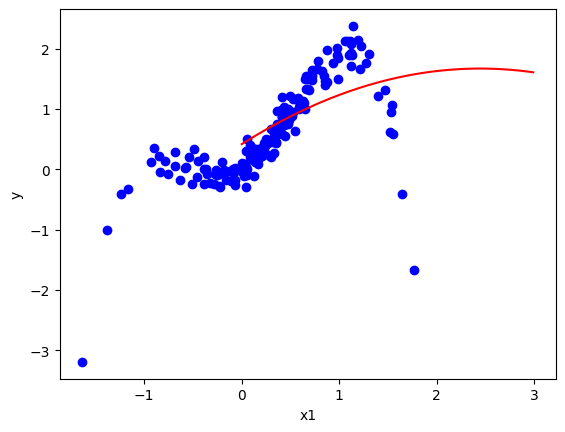

In [90]:
plt.scatter(train.x1, train.y,  color='blue')
XX = np.arange(0.0, 3.0, 0.01)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("x1")
plt.ylabel("y")

### model Evaluation

In [91]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y = np.asanyarray(test[['y']])
predict = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,predict))

Mean absolute error: 0.39
Residual sum of squares (MSE): 0.21
R2-score: 0.68
